# Análise de sobrevivência atletas federação

Inscrições depois de 2007

In [29]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

dt = pd.read_csv('https://raw.githubusercontent.com/pesobreiro/jupyternotebooks/master/dados/dadosAtletasAndebol.csv',
                 index_col=0)

plt.rcParams['figure.figsize'] = [10, 15]
datetime.datetime.now()

datetime.datetime(2019, 11, 21, 15, 16, 31, 660655)

In [30]:
def curvaSobrevivencia(dados,coluna,eixoX=None,eixoY=None,titulo=None):
    ax = plt.subplot(111)
    ax.set_xlabel(eixoX)
    ax.set_ylabel(eixoY)
    ax.set_title(titulo)

    plt.rcParams['figure.figsize'] = [15, 5]
    for item in dados[coluna].unique():
        ix = dados[coluna] == item
        kmf.fit(T.loc[ix], C.loc[ix], label=str(item))
        ax = kmf.plot(ax=ax)
        print('probabilidade de sobreviver:',item,' ',kmf.survival_function_.head())
        print('median:',item,kmf.median_)
    return kmf

In [31]:
def barras(x,dados,titulo,hue=None,orientacao=None,tamanho=[10,5]):
    plt.rcParams['figure.figsize'] = tamanho
    ax = sns.countplot(x=x,data=dados,hue=hue,palette='Blues',orient=orientacao);
    ax.set_title(titulo)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1}'.format(height),ha="left")    
    plt.show()

## Survival Analysis

In [32]:
dados=dt.dropna()

In [33]:
dt.shape

(197606, 24)

## Vamos considerar os atletas federados entre 01-08-1997 e 31-07-2018

dt=dt.loc[(dt.dtIns >= "1997-08-01")&(dt.dtIns < "2018-07-31")]

In [34]:
#Converter data inscrição para data e hora
dt['dtIns']=pd.to_datetime(dt['dtIns'])
dt=dt.loc[(dt.dtIns >= "2008-08-01")&(dt.dtIns < "2018-07-31")]

In [35]:
dt.shape

(34850, 24)

In [36]:
# Vamos considerar um escalao com todos os géneros
dt['escFedTodos'] = dt['escFederacao'].str.split().str.get(0)

In [37]:
dt.escFedTodos.unique()

array(['Veteranos', 'Seniores', 'Juniores', 'Juvenis', 'Minis',
       'Iniciados', 'Infantis', 'Bambis', 'Pre-Bambi'], dtype=object)

### Atletas por ano

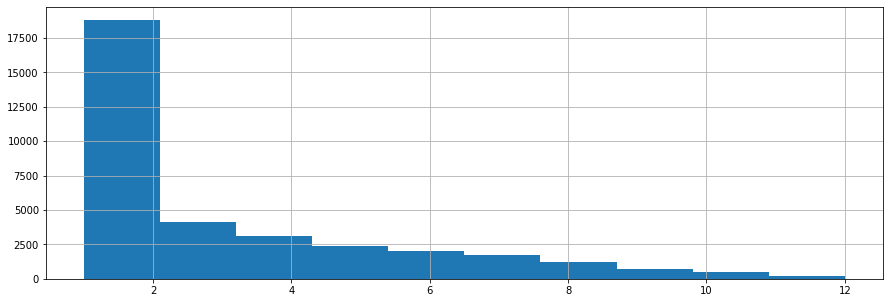

In [38]:
plt.rcParams['figure.figsize'] = [15, 5]
dt.anos.hist()

### Atletas por escalão

In [39]:
dt.columns

Index(['CIPA', 'associacao', 'clube', 'dtIns', 'escalao', 'escalaoSubida',
       'sexo', 'dtNasc', 'codPostal', 'localidade', 'pais', 'nacionalidade',
       'epoca', 'tipoInscricao', 'dtInsc', 'dtUlt', 'anos', 'idade',
       'abandonou', 'escaloesAnos', 'mes', 'escaloesIdade', 'anoNasc',
       'escFederacao', 'escFedTodos'],
      dtype='object')

In [40]:
dt.escaloesIdade.unique()

array(['41 a 60', '21 a 40', '10 a 20', 'ate 10', 'mais 60'], dtype=object)

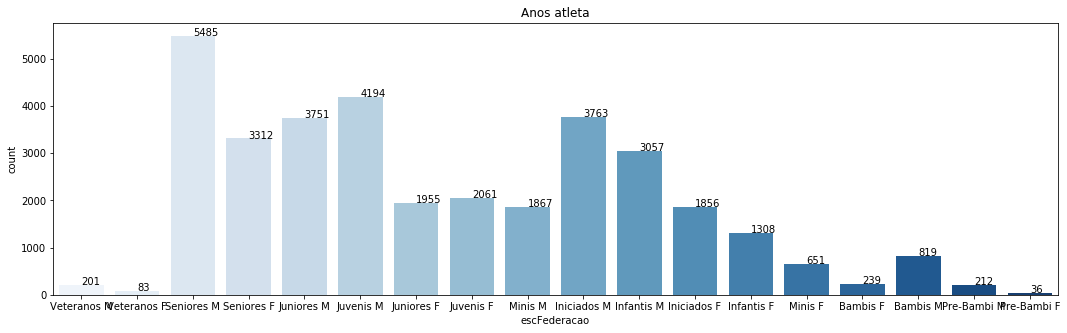

In [41]:
barras(dados=dt,titulo='Anos atleta',x='escFederacao',tamanho=[18,5])

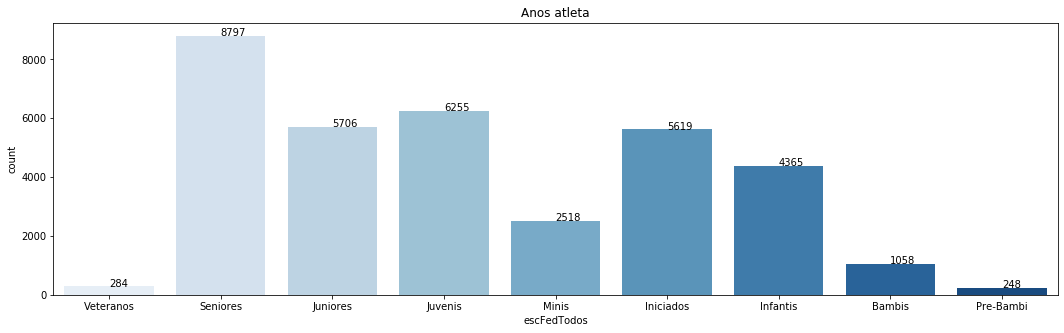

In [42]:
barras(dados=dt,titulo='Anos atleta',x='escFedTodos',tamanho=[18,5])

In [43]:
dt.columns

Index(['CIPA', 'associacao', 'clube', 'dtIns', 'escalao', 'escalaoSubida',
       'sexo', 'dtNasc', 'codPostal', 'localidade', 'pais', 'nacionalidade',
       'epoca', 'tipoInscricao', 'dtInsc', 'dtUlt', 'anos', 'idade',
       'abandonou', 'escaloesAnos', 'mes', 'escaloesIdade', 'anoNasc',
       'escFederacao', 'escFedTodos'],
      dtype='object')

### Atletas por anos inscritos
Quantos atletas se inscrever em cada ano desde 1997.

- Aparentemente existiram muitas inscrições antes 2007

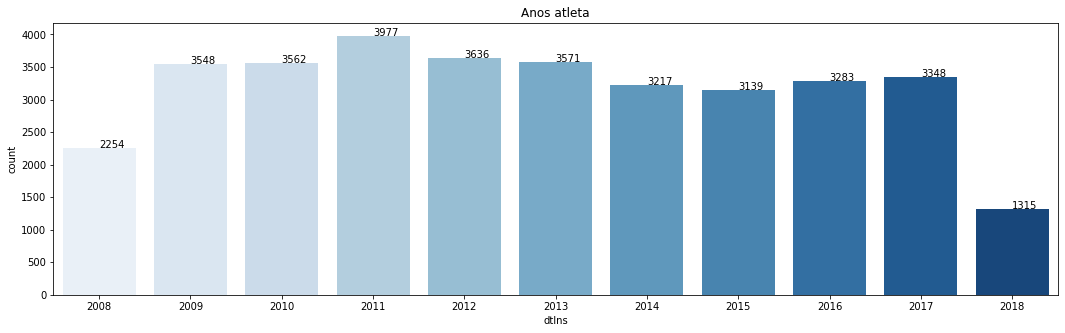

In [44]:
barras(dados=dt,titulo='Anos atleta',x=dt.dtIns.apply(lambda x: x.date().year),tamanho=[18,5])

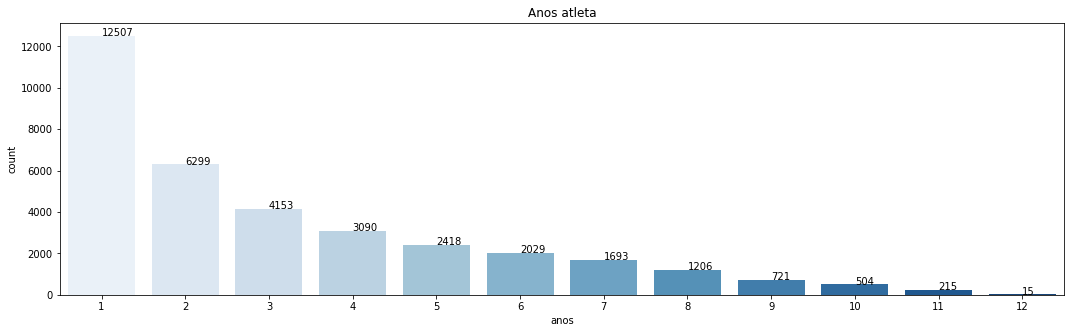

In [45]:
barras(dados=dt,titulo='Anos atleta',x='anos',tamanho=[18,5])

In [46]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = dt['anos']
C = dt['abandonou']
kmf.fit(T,C,label="Abandono dos atletas");

In [47]:
import lifelines

In [48]:
print('versao lifelines:',lifelines.__version__)

versao lifelines: 0.21.0


In [49]:
kmf.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,34850,34850
1.0,12507,11250,1257,0,34850
2.0,6299,4208,2091,0,22343
3.0,4153,2477,1676,0,16044
4.0,3090,1729,1361,0,11891


In [50]:
kmf.survival_function_.head()

,Abandono dos atletas
timeline,
0.0,1.000000
1.0,0.677188
2.0,0.549649
3.0,0.464790
4.0,0.397207


### A mediana de anos tempo permanência

A mediana de sobrevivência aumentou 1 ano. Se considerarmos os dados todos é de 2 anos.

In [51]:
print(kmf.median_)
dt['anos'].median()

3.0


2.0

### S(t) == P(T>t) probabilidade de viver mais do que 2 anos

In [52]:
kmf.predict(2.0)

0.5496488136476096

In [53]:
dt.anos.max()

12

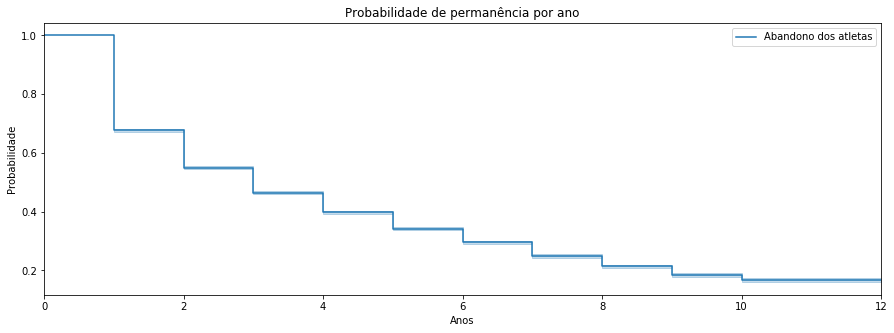

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
kmf.plot();
plt.title('Probabilidade de permanência por ano')
plt.xlabel('Anos')
plt.ylabel('Probabilidade');

A grande maioria dos atletas federados só fica um ano. 

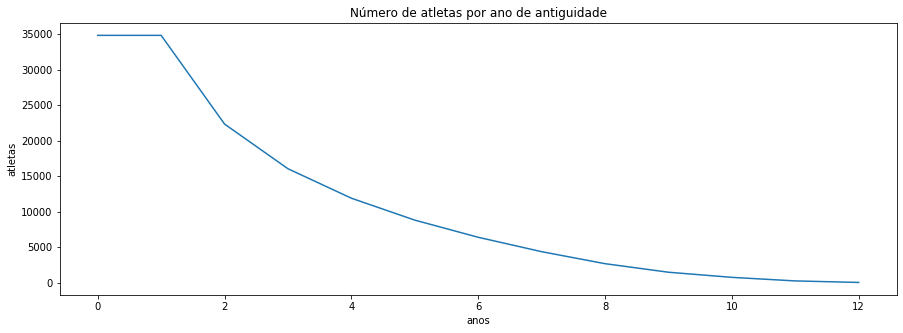

In [55]:
abandono=kmf.event_table.reset_index()

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(abandono.event_at, abandono.at_risk);
plt.title('Número de atletas por ano de antiguidade') 
plt.xlabel('anos')
plt.ylabel('atletas');
#plt.xlabel()

34850


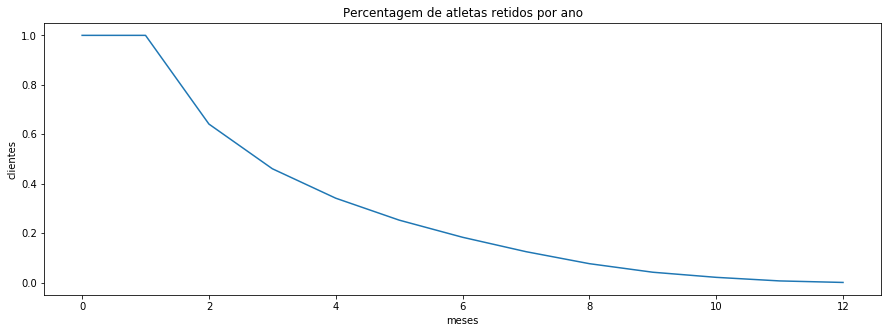

In [56]:
abandono['percentagemClientes']= 0.0
anterior = abandono.at_risk[0:1]
anterior = anterior[0]
print(anterior)

for index, row in abandono.iterrows():
    abandono.at[index, 'percentagemClientes'] = row.at_risk/anterior    

plt.title('Percentagem de atletas retidos por ano')
plt.rcParams['figure.figsize'] = [15, 5]
plt.xlabel('meses')
plt.ylabel('clientes')
plt.plot(abandono.event_at, abandono.percentagemClientes)
plt.show()

In [57]:
abandono.head()

,event_at,removed,observed,censored,entrance,at_risk,percentagemClientes
0,0.0,0,0,0,34850,34850,1.000000
1,1.0,12507,11250,1257,0,34850,1.000000
2,2.0,6299,4208,2091,0,22343,0.641119
3,3.0,4153,2477,1676,0,16044,0.460373
4,4.0,3090,1729,1361,0,11891,0.341205


### Curvas de sobrevivencia

In [58]:
# Importar bibliotecas
from lifelines.statistics import pairwise_logrank_test
from lifelines.statistics import multivariate_logrank_test

#### Por género

M    23349
F    11501
Name: sexo, dtype: int64
probabilidade de sobreviver: M                    M
timeline          
0.0       1.000000
1.0       0.683927
2.0       0.559331
3.0       0.476573
4.0       0.410355
median: M 3.0
probabilidade de sobreviver: F                    F
timeline          
0.0       1.000000
1.0       0.663508
2.0       0.529859
3.0       0.440678
4.0       0.370047
median: F 3.0


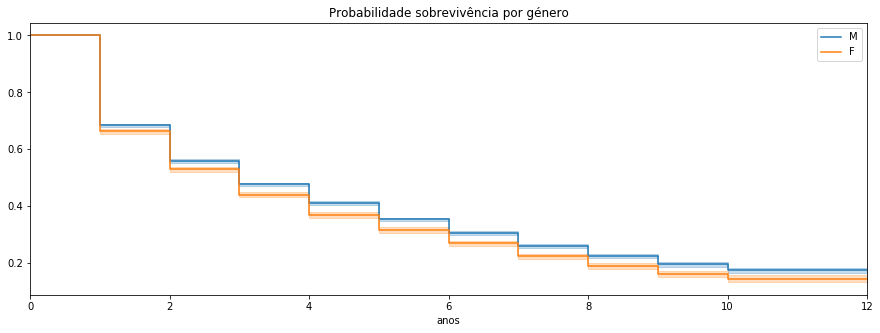

In [59]:
print(dt.sexo.value_counts())
curvaSobrevivencia(dt,'sexo',eixoX='anos',titulo='Probabilidade sobrevivência por género');plt.xlabel('anos');

In [60]:
results=multivariate_logrank_test(event_durations=T,groups=dt['sexo'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          50.52 <0.005     39.63


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [61]:
results=pairwise_logrank_test(event_durations=T,groups=dt.sexo,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
F M           50.52 <0.005     39.63


#### Por país

Portugal          34800
Resto do mundo       27
Europa               23
Name: pais, dtype: int64
probabilidade de sobreviver: Portugal             Portugal
timeline          
0.0       1.000000
1.0       0.677471
2.0       0.549929
3.0       0.465074
4.0       0.397433
median: Portugal 3.0
probabilidade de sobreviver: Resto do mundo             Resto do mundo
timeline                
0.0             1.000000
1.0             0.370370
3.0             0.296296
4.0             0.296296
6.0             0.222222
median: Resto do mundo 1.0
probabilidade de sobreviver: Europa               Europa
timeline          
0.0       1.000000
1.0       0.608696
2.0       0.327759
3.0       0.234114
4.0       0.175585
median: Europa 2.0


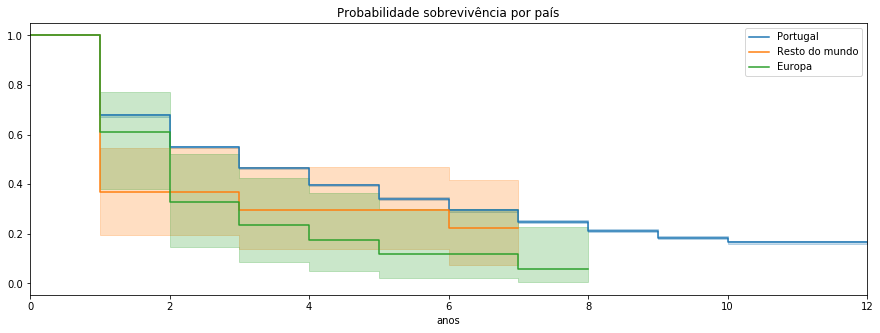

In [62]:
print(dt.pais.value_counts())
curvaSobrevivencia(dt,'pais',eixoX='anos',titulo='Probabilidade sobrevivência por país');plt.xlabel('anos');

In [35]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dt['pais'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2

---
 test_statistic    p  -log2(p)
           8.40 0.01      6.06


**Existem diferenças entre as curvas de sobrevivência.**

In [36]:
results=pairwise_logrank_test(event_durations=T,groups=dt.pais,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                         test_statistic    p  -log2(p)
Europa   Portugal                  5.70 0.02      5.88
         Resto do mundo            0.34 0.56      0.84
Portugal Resto do mundo            2.71 0.10      3.33


#### Por nacionalidade

Portugal          34800
Resto do mundo       27
Europa               23
Name: pais, dtype: int64
Portugal             Portugal
timeline          
0.0       1.000000
1.0       0.680470
2.0       0.553571
3.0       0.468964
4.0       0.401508
ND              ND
timeline     
0.0       1.0
1.0       0.0
Europa               Europa
timeline          
0.0       1.000000
1.0       0.570265
2.0       0.422418
3.0       0.324235
4.0       0.255841
Resto do mundo             Resto do mundo
timeline                
0.0             1.000000
1.0             0.595611
2.0             0.447140
3.0             0.358889
4.0             0.282686


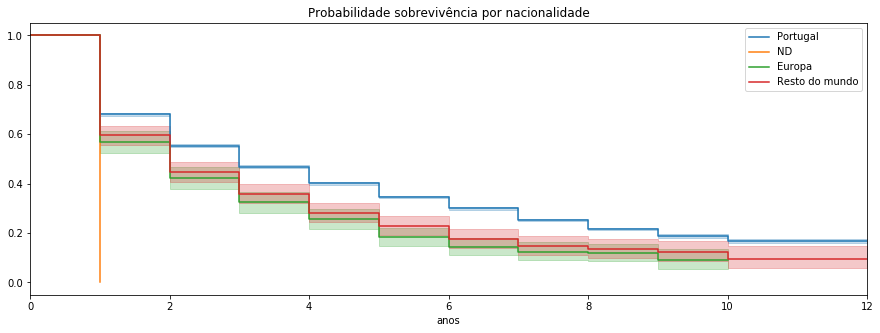

In [37]:
print(dt.pais.value_counts())
curvaSobrevivencia(dt,'nacionalidade',eixoX='anos',titulo='Probabilidade sobrevivência por nacionalidade');plt.xlabel('anos');

In [38]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dt['nacionalidade'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3

---
 test_statistic      p  -log2(p)
         117.15 <0.005     81.38


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [39]:
results=pairwise_logrank_test(event_durations=T,groups=dt.nacionalidade,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                         test_statistic      p  -log2(p)
Europa   ND                       11.64 <0.005     10.60
         Portugal                 58.71 <0.005     45.63
         Resto do mundo            1.65   0.20      2.32
ND       Portugal                 19.15 <0.005     16.34
         Resto do mundo           12.97 <0.005     11.63
Portugal Resto do mundo           41.27 <0.005     32.81


**Correr novamente os testes sem os NDs**

#### Por associacoes

Vamos considerar só associações com mais de 2000 federados

In [40]:
associacoes=['Porto','Lisboa','Aveiro','Braga','Madeira','Viseu','Leiria']
dtAssociacoes=dt.loc[dt['associacao'].isin(associacoes)]

In [41]:
dtAssociacoes.associacao.value_counts()

Porto      7114
Lisboa     4092
Aveiro     3453
Braga      2993
Madeira    2570
Viseu      2475
Leiria     2278
Name: associacao, dtype: int64

Porto                Porto
timeline          
0.0       1.000000
1.0       0.703823
2.0       0.585492
3.0       0.508137
4.0       0.450381
Lisboa               Lisboa
timeline          
0.0       1.000000
1.0       0.635142
2.0       0.506910
3.0       0.423994
4.0       0.365250
Madeira              Madeira
timeline          
0.0       1.000000
1.0       0.590661
2.0       0.447483
3.0       0.363610
4.0       0.312606
Aveiro               Aveiro
timeline          
0.0       1.000000
1.0       0.701129
2.0       0.579838
3.0       0.499389
4.0       0.449831
Viseu                Viseu
timeline          
0.0       1.000000
1.0       0.793939
2.0       0.697055
3.0       0.601006
4.0       0.511256
Braga                Braga
timeline          
0.0       1.000000
1.0       0.669896
2.0       0.515360
3.0       0.436927
4.0       0.378860
Leiria               Leiria
timeline          
0.0       1.000000
1.0       0.668569
2.0       0.563176
3.0       0.493700
4.0       0.430958


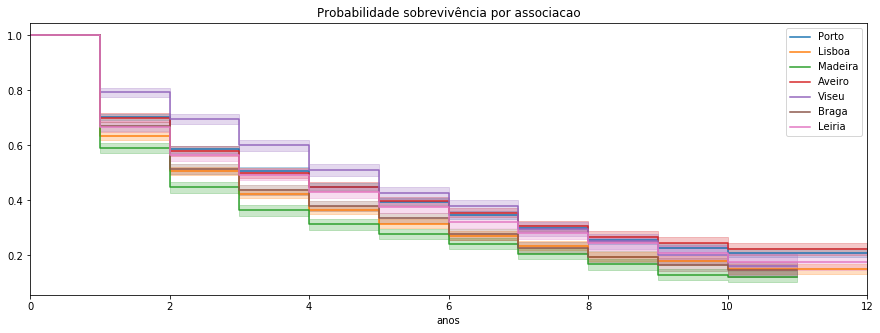

In [42]:
T = dtAssociacoes['anos']
C = dtAssociacoes['abandonou']
kmf.fit(T,C,label="Abandono dos atletas")
curvaSobrevivencia(dtAssociacoes,'associacao',eixoX='anos',titulo='Probabilidade sobrevivência por associacao');plt.xlabel('anos');

Vamos considerar só associações com menos de 2000 federados

In [43]:
dt.associacao.value_counts()

Porto                7114
Lisboa               4092
Aveiro               3453
Braga                2993
Madeira              2570
Viseu                2475
Leiria               2278
Algarve              1720
Setubal              1716
Santarem             1643
Guarda                526
Vila Real             510
Beja                  490
Ilha S. Miguel        431
Ilha Terceira         420
Portalegre            398
Ilha Faial            360
Evora                 337
Coimbra               327
Castelo Branco        230
Ilha S. Maria         214
V. Castelo            109
Ilha Graciosa         108
Leiria A Praia         90
Braganca               71
Porto A Praia          41
SetÃºbal - A 4ALL      19
Andebol de Praia       13
Porto - A 4LL          12
Aveiro -  4ALL         12
Lisboa A Praia         12
Leiria - A 4ALL        11
Algarve - A 4ALL       11
Lisboa - A 4ALL        11
Viseu A Praia           8
Aveiro A Praia          7
Madeira A Praia         6
L.P.A.                  5
F.A.P.      

Algarve              1720
Setubal              1716
Santarem             1643
Guarda                526
Vila Real             510
Beja                  490
Ilha S. Miguel        431
Ilha Terceira         420
Portalegre            398
Ilha Faial            360
Evora                 337
Coimbra               327
Castelo Branco        230
Ilha S. Maria         214
V. Castelo            109
Ilha Graciosa         108
Leiria A Praia         90
Braganca               71

In [44]:
associacoes=['Algarve','Setubal','Santarem','Guarda','Vila Real','Beja','Ilha S. Miguel','Ilha Terceira','Portalegre',
             'Ilha Faial','Evora','Coimbra','Castelo Branco','Ilha S. Maria','V. Castelo','Ilha Graciosa','Braganca']
dtAssociacoes=dt.loc[dt['associacao'].isin(associacoes)]

In [45]:
dtAssociacoes.associacao.value_counts()

Algarve           1720
Setubal           1716
Santarem          1643
Guarda             526
Vila Real          510
Beja               490
Ilha S. Miguel     431
Ilha Terceira      420
Portalegre         398
Ilha Faial         360
Evora              337
Coimbra            327
Castelo Branco     230
Ilha S. Maria      214
V. Castelo         109
Ilha Graciosa      108
Braganca            71
Name: associacao, dtype: int64

Santarem             Santarem
timeline          
0.0       1.000000
1.0       0.642727
2.0       0.494598
3.0       0.407041
4.0       0.348060
V. Castelo             V. Castelo
timeline            
0.0         1.000000
1.0         0.458716
2.0         0.305810
3.0         0.215200
4.0         0.181221
Portalegre             Portalegre
timeline            
0.0         1.000000
1.0         0.660804
2.0         0.526000
3.0         0.454142
4.0         0.371269
Algarve              Algarve
timeline          
0.0       1.000000
1.0       0.641860
2.0       0.506229
3.0       0.401261
4.0       0.338352
Evora                Evora
timeline          
0.0       1.000000
1.0       0.729970
2.0       0.628756
3.0       0.543017
4.0       0.440172
Setubal              Setubal
timeline          
0.0       1.000000
1.0       0.601981
2.0       0.493997
3.0       0.420865
4.0       0.373735
Coimbra              Coimbra
timeline          
0.0       1.000000
1.0       0.565749
2.0       0.385321
3.0 

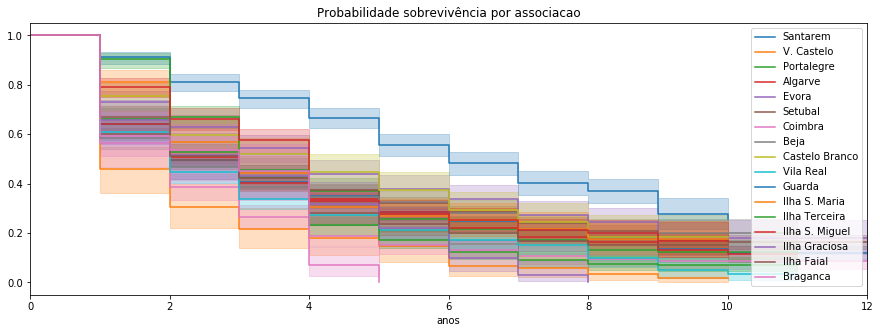

In [46]:
T = dtAssociacoes['anos']
C = dtAssociacoes['abandonou']
kmf.fit(T,C,label="Abandono dos atletas")
curvaSobrevivencia(dtAssociacoes,'associacao',eixoX='anos',titulo='Probabilidade sobrevivência por associacao');plt.xlabel('anos');

In [47]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dtAssociacoes['associacao'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 16

---
 test_statistic      p  -log2(p)
         318.05 <0.005    190.47


É maios ou menos igual. Porto e Braga aparentemente com melhores retenções

**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [48]:
results=pairwise_logrank_test(event_durations=T,groups=dtAssociacoes['associacao'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                               test_statistic      p  -log2(p)
Algarve        Beja                      0.01   0.90      0.15
               Braganca                 13.82 <0.005     12.28
               Castelo Branco            9.08 <0.005      8.59
               Coimbra                  22.32 <0.005     18.72
               Evora                    17.55 <0.005     15.13
               Guarda                  153.58 <0.005    114.75
               Ilha Faial                0.08   0.77      0.37
               Ilha Graciosa             4.25   0.04      4.67
               Ilha S. Maria             2.87   0.09      3.47
               Ilha S. Miguel           12.63 <0.005     11.36
               Ilha Terceira             0.05   0.83      0.27
               Portalegre                0.19   0.66      0.60
               Santarem                  0.37   0.54      0.89
   

#### Escalões Federação Femininos e MAsc

In [49]:
dtFem = dt.loc[dt.sexo=='F']
dtMasc = dt.loc[dt.sexo=='M']

Veteranos F             Veteranos F
timeline             
0.0          1.000000
1.0          0.638554
2.0          0.590663
3.0          0.548472
4.0          0.313413
Seniores F             Seniores F
timeline            
0.0         1.000000
1.0         0.599336
2.0         0.429180
3.0         0.310744
4.0         0.243084
Juniores F             Juniores F
timeline            
0.0         1.000000
1.0         0.655243
2.0         0.510324
3.0         0.424042
4.0         0.340651
Juvenis F             Juvenis F
timeline           
0.0        1.000000
1.0        0.675400
2.0        0.557067
3.0        0.481272
4.0        0.409405
Iniciados F             Iniciados F
timeline             
0.0          1.000000
1.0          0.700970
2.0          0.596546
3.0          0.533112
4.0          0.480675
Infantis F             Infantis F
timeline            
0.0         1.000000
1.0         0.707187
2.0         0.604354
3.0         0.543010
4.0         0.518499
Minis F              Minis F
tim

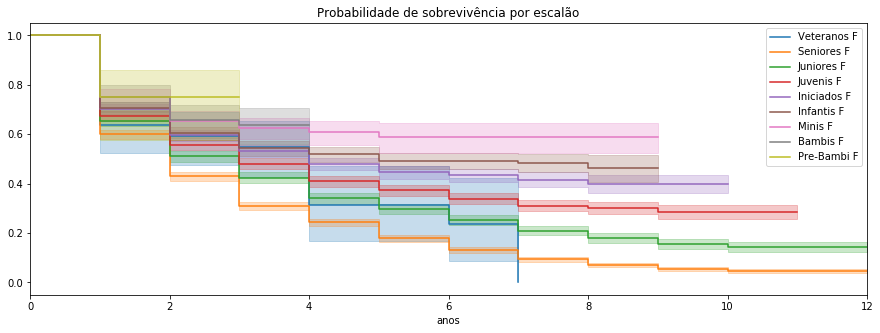

In [50]:
T = dtFem['anos']
C = dtFem['abandonou']
kmf.fit(T,C,label="Abandono dos atletas")
curvaSobrevivencia(dtFem,'escFederacao',eixoX='anos',titulo='Probabilidade de sobrevivência por escalão');plt.xlabel('anos');

In [51]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dtFem['escFederacao'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 8

---
 test_statistic      p  -log2(p)
         724.14 <0.005    499.43


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [52]:
results=pairwise_logrank_test(event_durations=T,groups=dtFem.escFederacao,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                         test_statistic      p  -log2(p)
Bambis F    Infantis F             3.17   0.07      3.74
            Iniciados F            4.34   0.04      4.75
            Juniores F            18.81 <0.005     16.08
            Juvenis F             10.25 <0.005      9.52
            Minis F                0.01   0.91      0.14
            Pre-Bambi F            0.30   0.58      0.78
            Seniores F            44.85 <0.005     35.46
            Veteranos F            3.94   0.05      4.41
Infantis F  Iniciados F            2.03   0.15      2.69
            Juniores F            79.12 <0.005     60.57
            Juvenis F             25.38 <0.005     21.02
            Minis F                7.72   0.01      7.52
            Pre-Bambi F            1.38   0.24      2.06
            Seniores F           269.13 <0.005    198.50
            Veteranos F       

Veteranos M             Veteranos M
timeline             
0.0          1.000000
1.0          0.502488
2.0          0.421441
3.0          0.331773
4.0          0.299666
Seniores M             Seniores M
timeline            
0.0         1.000000
1.0         0.586691
2.0         0.426152
3.0         0.326784
4.0         0.249850
Juniores M             Juniores M
timeline            
0.0         1.000000
1.0         0.661957
2.0         0.518636
3.0         0.423233
4.0         0.351735
Juvenis M             Juvenis M
timeline           
0.0        1.000000
1.0        0.703624
2.0        0.589340
3.0        0.510190
4.0        0.442501
Minis M              Minis M
timeline          
0.0       1.000000
1.0       0.748795
2.0       0.651682
3.0       0.603334
4.0       0.568431
Iniciados M             Iniciados M
timeline             
0.0          1.000000
1.0          0.733192
2.0          0.621703
3.0          0.556744
4.0          0.514106
Infantis M             Infantis M
timeline       

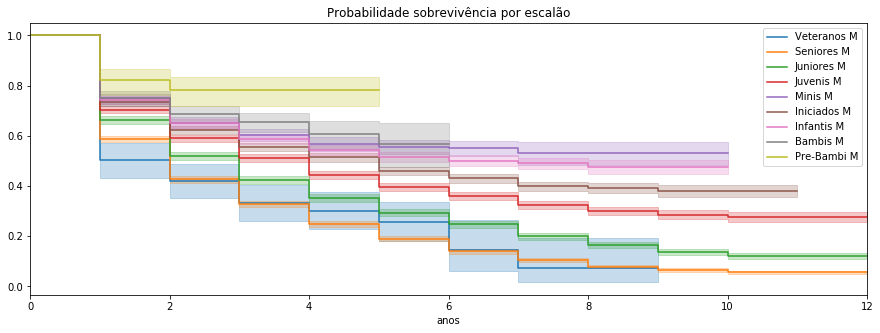

In [53]:
T = dtMasc['anos']
C = dtMasc['abandonou']
kmf.fit(T,C,label="Abandono dos atletas")
curvaSobrevivencia(dtMasc,'escFederacao',eixoX='anos',titulo='Probabilidade sobrevivência por escalão');plt.xlabel('anos');

In [54]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dtMasc['escFederacao'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 8

---
 test_statistic      p  -log2(p)
        1810.54 <0.005       inf


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [55]:
results=pairwise_logrank_test(event_durations=T,groups=dtMasc.escFederacao,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                         test_statistic      p  -log2(p)
Bambis M    Infantis M             4.23   0.04      4.66
            Iniciados M           11.57 <0.005     10.55
            Juniores M            81.57 <0.005     62.36
            Juvenis M             30.30 <0.005     24.69
            Minis M                2.00   0.16      2.67
            Pre-Bambi M            7.80   0.01      7.58
            Seniores M           194.66 <0.005    144.56
            Veteranos M           64.33 <0.005     49.75
Infantis M  Iniciados M           14.78 <0.005     13.01
            Juniores M           315.26 <0.005    231.89
            Juvenis M             84.13 <0.005     64.23
            Minis M                1.53   0.22      2.21
            Pre-Bambi M           14.17 <0.005     12.55
            Seniores M           840.30 <0.005    611.33
            Veteranos M       

#### Ambos os escalões

Veteranos             Veteranos
timeline           
0.0        1.000000
1.0        0.542254
2.0        0.468866
3.0        0.393847
4.0        0.315078
Seniores             Seniores
timeline          
0.0       1.000000
1.0       0.591452
2.0       0.427293
3.0       0.320729
4.0       0.247303
Juniores             Juniores
timeline          
0.0       1.000000
1.0       0.659657
2.0       0.515792
3.0       0.423489
4.0       0.348016
Juvenis              Juvenis
timeline          
0.0       1.000000
1.0       0.694325
2.0       0.578740
3.0       0.500698
4.0       0.431781
Minis                Minis
timeline          
0.0       1.000000
1.0       0.749007
2.0       0.652473
3.0       0.607894
4.0       0.575604
Iniciados             Iniciados
timeline           
0.0        1.000000
1.0        0.722548
2.0        0.613376
3.0        0.548943
4.0        0.503592
Infantis             Infantis
timeline          
0.0       1.000000
1.0       0.732417
2.0       0.635720
3.0       0.573923

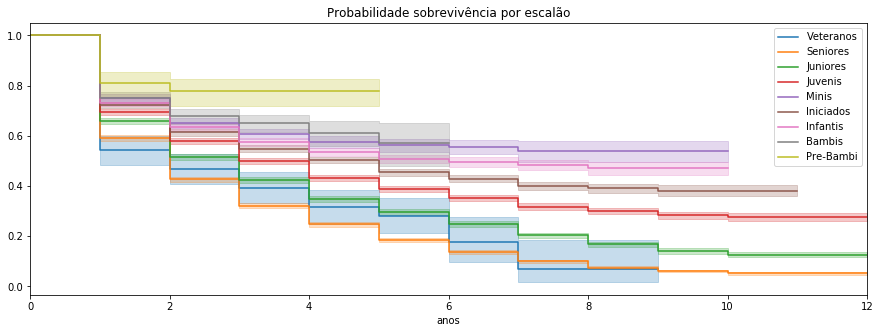

In [56]:
T = dt['anos']
C = dt['abandonou']
kmf.fit(T,C,label="Abandono dos atletas")
curvaSobrevivencia(dt,'escFedTodos',eixoX='anos',titulo='Probabilidade sobrevivência por escalão');plt.xlabel('anos');

#### Por tipo de inscrição

primeiraInsc             primeiraInsc
timeline              
0.0           1.000000
1.0           0.677338
2.0           0.549780
3.0           0.464932
4.0           0.397379
revalComTransf             revalComTransf
timeline                
0.0             1.000000
1.0             0.416667
2.0             0.333333
3.0             0.166667
5.0             0.166667
revalidacao             revalidacao
timeline             
0.0              1.00
1.0              0.75
2.0              0.50
4.0              0.25
5.0              0.25
naoDefinido             naoDefinido
timeline             
0.0               1.0
1.0               0.0
selecao             selecao
timeline         
0.0          1.00
1.0          0.25
4.0          0.00


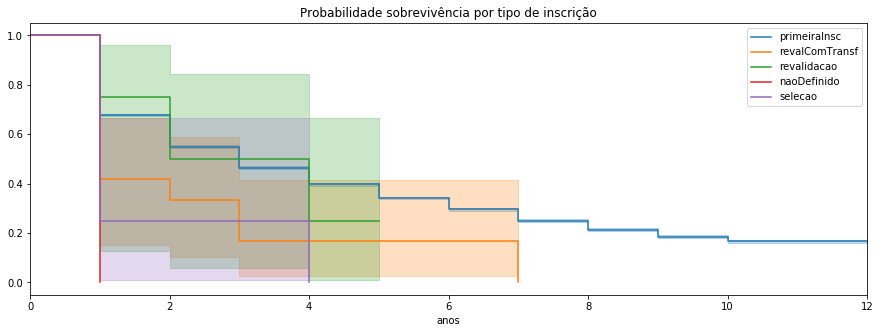

In [57]:
T = dt['anos']
C = dt['abandonou']
curvaSobrevivencia(dt,'tipoInscricao',eixoX='anos',titulo='Probabilidade sobrevivência por tipo de inscrição');plt.xlabel('anos');

In [58]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dt['tipoInscricao'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4

---
 test_statistic    p  -log2(p)
          10.79 0.03      5.11


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [59]:
results=pairwise_logrank_test(event_durations=T,groups=dt.tipoInscricao,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                               test_statistic    p  -log2(p)
naoDefinido    primeiraInsc              2.10 0.15      2.76
               revalComTransf            0.62 0.43      1.22
               revalidacao               1.50 0.22      2.18
               selecao                   0.25 0.62      0.70
primeiraInsc   revalComTransf            4.76 0.03      5.10
               revalidacao               0.08 0.77      0.37
               selecao                   3.85 0.05      4.33
revalComTransf revalidacao               0.46 0.50      1.01
               selecao                   0.27 0.61      0.72
revalidacao    selecao                   1.20 0.27      1.87


#### Vamos ver este mandato em relação aos anteriores

In [60]:
dt.loc[:,'esteMandato']=0

In [61]:
dt.dtIns=pd.to_datetime(dt.dtIns)
dt.loc[:,'anoInsc']=0
dt['anoInsc']=dt['dtIns'].apply(lambda x: x.year)

In [62]:
dt.columns

Index(['CIPA', 'associacao', 'clube', 'dtIns', 'escalao', 'escalaoSubida',
       'sexo', 'dtNasc', 'codPostal', 'localidade', 'pais', 'nacionalidade',
       'epoca', 'tipoInscricao', 'dtInsc', 'dtUlt', 'anos', 'idade',
       'abandonou', 'escaloesAnos', 'mes', 'escaloesIdade', 'anoNasc',
       'escFederacao', 'escFedTodos', 'esteMandato', 'anoInsc'],
      dtype='object')

In [63]:
dt.loc[dt.anoInsc >= 2012,'esteMandato'] = 1

In [64]:
dt.esteMandato.value_counts()

1    21509
0    13341
Name: esteMandato, dtype: int64

1                    1
timeline          
0.0       1.000000
1.0       0.690920
2.0       0.574260
3.0       0.498427
4.0       0.433079
0                    0
timeline          
0.0       1.000000
1.0       0.655048
2.0       0.511806
3.0       0.417360
4.0       0.349899


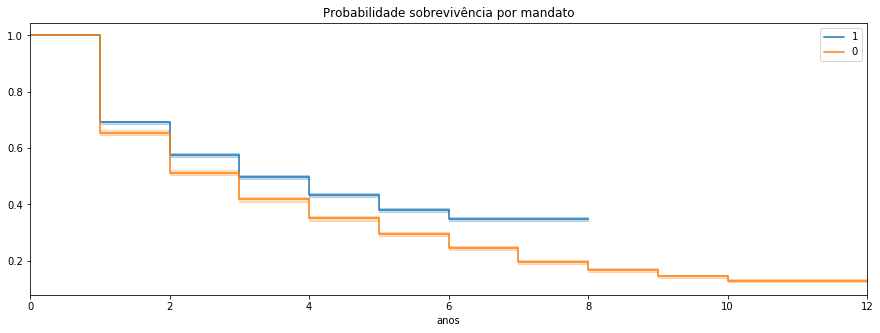

In [65]:
T = dt['anos']
C = dt['abandonou']
curvaSobrevivencia(dt,'esteMandato',eixoX='anos',titulo='Probabilidade sobrevivência por mandato');plt.xlabel('anos');

In [66]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dt['esteMandato'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
         379.14 <0.005    278.10


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [67]:
results=pairwise_logrank_test(event_durations=T,groups=dt.esteMandato,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1          379.14 <0.005    278.10


## Tratamento para a análise de cox
Fazer o fit

In [68]:
T = dt['anos']
C = dt['abandonou']
kmf.fit(T,C,label="Abandono dos atletas");

In [69]:
dt.head()

,CIPA,associacao,clube,dtIns,escalao,escalaoSubida,sexo,dtNasc,codPostal,localidade,...,idade,abandonou,escaloesAnos,mes,escaloesIdade,anoNasc,escFederacao,escFedTodos,esteMandato,anoInsc
54290,15122,Porto,ASSOCIACAO ACADEMICA S. MAMEDE,2016-11-15,Seniores M,15122.0,M,1958-04-30,-,ND,...,60,1,1 a 2,11,41 a 60,1958,Veteranos M,Veteranos,1,2016
69899,18162,Lisboa,N.A.A.L.PASSOS MANUEL,2015-03-27,Seniores M,18162.0,M,1960-10-03,1200-045,Lisboa,...,58,1,1 a 2,3,41 a 60,1960,Veteranos M,Veteranos,1,2015
57033,22435,Lisboa,Ginasio Clube Sul,2014-04-24,Seniores M,22435.0,M,1960-04-23,2815-683 Sobreda,ND,...,58,0,mais 3,4,41 a 60,1960,Veteranos M,Veteranos,1,2014
330626,23080,Lisboa,N.A.A.L.PASSOS MANUEL,2015-03-18,Seniores M,23080.0,M,1962-08-24,1350-073,ND,...,56,0,mais 3,3,41 a 60,1962,Veteranos M,Veteranos,1,2015
419382,23205,Lisboa,Ginasio Clube Sul,2014-04-24,Seniores M,23205.0,M,1962-02-24,2820-274,Charneca Caparica,...,57,1,mais 3,4,41 a 60,1962,Veteranos M,Veteranos,1,2014


### Vamos criar as dummies
Criar dummies e eliminar a primeira para evitar a colinariedade

In [70]:
dtCox = dt.copy()

In [71]:
dtCox.head()

,CIPA,associacao,clube,dtIns,escalao,escalaoSubida,sexo,dtNasc,codPostal,localidade,...,idade,abandonou,escaloesAnos,mes,escaloesIdade,anoNasc,escFederacao,escFedTodos,esteMandato,anoInsc
54290,15122,Porto,ASSOCIACAO ACADEMICA S. MAMEDE,2016-11-15,Seniores M,15122.0,M,1958-04-30,-,ND,...,60,1,1 a 2,11,41 a 60,1958,Veteranos M,Veteranos,1,2016
69899,18162,Lisboa,N.A.A.L.PASSOS MANUEL,2015-03-27,Seniores M,18162.0,M,1960-10-03,1200-045,Lisboa,...,58,1,1 a 2,3,41 a 60,1960,Veteranos M,Veteranos,1,2015
57033,22435,Lisboa,Ginasio Clube Sul,2014-04-24,Seniores M,22435.0,M,1960-04-23,2815-683 Sobreda,ND,...,58,0,mais 3,4,41 a 60,1960,Veteranos M,Veteranos,1,2014
330626,23080,Lisboa,N.A.A.L.PASSOS MANUEL,2015-03-18,Seniores M,23080.0,M,1962-08-24,1350-073,ND,...,56,0,mais 3,3,41 a 60,1962,Veteranos M,Veteranos,1,2015
419382,23205,Lisboa,Ginasio Clube Sul,2014-04-24,Seniores M,23205.0,M,1962-02-24,2820-274,Charneca Caparica,...,57,1,mais 3,4,41 a 60,1962,Veteranos M,Veteranos,1,2014


In [72]:
dtCox.drop(['CIPA','clube','dtIns','escalao','escalaoSubida','dtNasc','codPostal',
            'localidade','dtInsc','nacionalidade','epoca','dtUlt','escaloesAnos','escaloesIdade','escFederacao'],axis=1,inplace=True)

In [73]:
dtCox.columns

Index(['associacao', 'sexo', 'pais', 'tipoInscricao', 'anos', 'idade',
       'abandonou', 'mes', 'anoNasc', 'escFedTodos', 'esteMandato', 'anoInsc'],
      dtype='object')

In [74]:
dtCox['associacao'].unique()

array(['Porto', 'Lisboa', 'Madeira', 'Setubal A Praia', 'Aveiro',
       'Leiria A Praia', 'Santarem', 'Viseu', 'V. Castelo', 'Braga',
       'Andebol de Praia', 'Portalegre', 'Porto A Praia', 'Algarve',
       'Evora', 'Leiria', 'L.P.A.', 'Setubal', 'Coimbra', 'Beja',
       'Castelo Branco', 'Vila Real', 'Guarda', 'Ilha S. Maria',
       'Ilha Terceira', 'Ilha S. Miguel', 'Ilha Graciosa', 'Ilha Faial',
       'Braganca', 'F.A.P.', 'Aveiro A Praia', 'Lisboa A Praia',
       'Madeira A Praia', 'Viseu A Praia', 'Algarve - A 4ALL',
       'Lisboa - A 4ALL', 'SetÃºbal - A 4ALL', 'Aveiro -  4ALL',
       'Leiria - A 4ALL', 'Porto - A 4LL'], dtype=object)

In [75]:
associacoes=['Porto','Lisboa','Aveiro','Leiria','Viseu','Madeira','Setubal','Braga','Algarve','Santarem']
dtCoxAssociacoesMaiores=dtCox.loc[dtCox['associacao'].isin(associacoes)].copy()
dtCoxAssociacoesTodas=dtCox.copy()

In [76]:
dtCoxAssociacoesMaiores = pd.get_dummies(dtCoxAssociacoesMaiores,columns=['associacao','sexo','pais','tipoInscricao','esteMandato'],drop_first=True)
dtCoxAssociacoesTodas = pd.get_dummies(dtCoxAssociacoesTodas,columns=['associacao','sexo','pais','tipoInscricao','esteMandato'],drop_first=True)

### Alterar para permitir o campo novo escFedTodos... criar dummies com isto...

In [77]:
dtCoxAssociacoesMaiores.columns

Index(['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'escFedTodos',
       'anoInsc', 'associacao_Aveiro', 'associacao_Braga', 'associacao_Leiria',
       'associacao_Lisboa', 'associacao_Madeira', 'associacao_Porto',
       'associacao_Santarem', 'associacao_Setubal', 'associacao_Viseu',
       'sexo_M', 'pais_Portugal', 'pais_Resto do mundo',
       'tipoInscricao_primeiraInsc', 'tipoInscricao_revalComTransf',
       'tipoInscricao_revalidacao', 'esteMandato_1'],
      dtype='object')

In [78]:
dtCoxAssociacoesMaiores = pd.get_dummies(dtCoxAssociacoesMaiores,columns=['escFedTodos'],drop_first=True)

In [79]:
dtCoxAssociacoesMaiores.columns

Index(['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'anoInsc',
       'associacao_Aveiro', 'associacao_Braga', 'associacao_Leiria',
       'associacao_Lisboa', 'associacao_Madeira', 'associacao_Porto',
       'associacao_Santarem', 'associacao_Setubal', 'associacao_Viseu',
       'sexo_M', 'pais_Portugal', 'pais_Resto do mundo',
       'tipoInscricao_primeiraInsc', 'tipoInscricao_revalComTransf',
       'tipoInscricao_revalidacao', 'esteMandato_1', 'escFedTodos_Infantis',
       'escFedTodos_Iniciados', 'escFedTodos_Juniores', 'escFedTodos_Juvenis',
       'escFedTodos_Minis', 'escFedTodos_Pre-Bambi', 'escFedTodos_Seniores',
       'escFedTodos_Veteranos'],
      dtype='object')

### Regressão de Cox

In [80]:
dtCoxAssociacoesMaiores.columns

Index(['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'anoInsc',
       'associacao_Aveiro', 'associacao_Braga', 'associacao_Leiria',
       'associacao_Lisboa', 'associacao_Madeira', 'associacao_Porto',
       'associacao_Santarem', 'associacao_Setubal', 'associacao_Viseu',
       'sexo_M', 'pais_Portugal', 'pais_Resto do mundo',
       'tipoInscricao_primeiraInsc', 'tipoInscricao_revalComTransf',
       'tipoInscricao_revalidacao', 'esteMandato_1', 'escFedTodos_Infantis',
       'escFedTodos_Iniciados', 'escFedTodos_Juniores', 'escFedTodos_Juvenis',
       'escFedTodos_Minis', 'escFedTodos_Pre-Bambi', 'escFedTodos_Seniores',
       'escFedTodos_Veteranos'],
      dtype='object')

In [81]:
cols = ['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'anoInsc','associacao_Aveiro', 'associacao_Braga', 'associacao_Leiria',
        'associacao_Lisboa', 'associacao_Madeira', 'associacao_Porto','associacao_Santarem', 'associacao_Setubal', 'associacao_Viseu',
        'sexo_M', 'pais_Portugal', 'pais_Resto do mundo','tipoInscricao_naoDefinido', 'tipoInscricao_primeiraInsc','tipoInscricao_revalidacao','esteMandato_1']

In [82]:
events = dtCoxAssociacoesMaiores['abandonou'].astype(bool)
print(dtCoxAssociacoesMaiores.loc[events, 'idade'].var())
print(dtCoxAssociacoesMaiores.loc[~events, 'idade'].var())

20.66926620309091
16.776894460999905


In [83]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtCoxAssociacoesMaiores,duration_col='anos',event_col='abandonou',show_progress=True)

C:\Users\user\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:905: ConvergenceWarning: Column(s) ['tipoInscricao_revalidacao'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:925: ConvergenceWarning: Column tipoInscricao_revalComTransf have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['abandonou'].astype(bool)
>>> print(df.loc[events, 'tipoInscricao_revalComTransf'].var())
>>> print(df.loc[~events, 'tipoInscricao_revalComTransf'].var())

A very low variance means that the column tipoInscricao_revalComTransf completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separ

Iteration 1: norm_delta = 0.86790, step_size = 0.9500, ll = -189543.28403, newton_decrement = 1509.30096, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.27950, step_size = 0.9500, ll = -188161.09492, newton_decrement = 41.33215, seconds_since_start = 0.3
Iteration 3: norm_delta = 0.04306, step_size = 0.9500, ll = -188117.34544, newton_decrement = 2.18798, seconds_since_start = 0.4
Iteration 4: norm_delta = 0.01519, step_size = 1.0000, ll = -188114.87486, newton_decrement = 0.34338, seconds_since_start = 0.5
Iteration 5: norm_delta = 0.00611, step_size = 1.0000, ll = -188114.47708, newton_decrement = 0.03132, seconds_since_start = 0.7
Iteration 6: norm_delta = 0.00078, step_size = 1.0000, ll = -188114.44358, newton_decrement = 0.00041, seconds_since_start = 0.8
Iteration 7: norm_delta = 0.00001, step_size = 1.0000, ll = -188114.44316, newton_decrement = 0.00000, seconds_since_start = 0.9
Convergence completed after 7 iterations.


<lifelines.CoxPHFitter: fitted with 30054 observations, 10437 censored>

In [84]:
dtCoxAssociacoesMaiores.columns

Index(['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'anoInsc',
       'associacao_Aveiro', 'associacao_Braga', 'associacao_Leiria',
       'associacao_Lisboa', 'associacao_Madeira', 'associacao_Porto',
       'associacao_Santarem', 'associacao_Setubal', 'associacao_Viseu',
       'sexo_M', 'pais_Portugal', 'pais_Resto do mundo',
       'tipoInscricao_primeiraInsc', 'tipoInscricao_revalComTransf',
       'tipoInscricao_revalidacao', 'esteMandato_1', 'escFedTodos_Infantis',
       'escFedTodos_Iniciados', 'escFedTodos_Juniores', 'escFedTodos_Juvenis',
       'escFedTodos_Minis', 'escFedTodos_Pre-Bambi', 'escFedTodos_Seniores',
       'escFedTodos_Veteranos'],
      dtype='object')

In [85]:
cols=['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'anoInsc','associacao_Aveiro', 'associacao_Braga', 'associacao_Leiria','associacao_Lisboa', 'associacao_Madeira', 
 'associacao_Porto','associacao_Santarem', 'associacao_Setubal', 'associacao_Viseu','sexo_M', 'pais_Portugal', 'pais_Resto do mundo',
      'tipoInscricao_primeiraInsc','esteMandato_1', 'escFedTodos_Infantis', 'escFedTodos_Iniciados','escFedTodos_Juniores', 'escFedTodos_Juvenis', 
      'escFedTodos_Minis','escFedTodos_Pre-Bambi', 'escFedTodos_Seniores','escFedTodos_Veteranos']

In [86]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtCoxAssociacoesMaiores[cols],duration_col='anos',event_col='abandonou',show_progress=True)

Iteration 1: norm_delta = 0.86497, step_size = 0.9500, ll = -189543.28403, newton_decrement = 1506.57979, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.27853, step_size = 0.9500, ll = -188153.05501, newton_decrement = 35.51183, seconds_since_start = 0.2
Iteration 3: norm_delta = 0.03788, step_size = 0.9500, ll = -188116.26059, newton_decrement = 0.59915, seconds_since_start = 0.3
Iteration 4: norm_delta = 0.00239, step_size = 1.0000, ll = -188115.65687, newton_decrement = 0.00274, seconds_since_start = 0.4
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -188115.65413, newton_decrement = 0.00000, seconds_since_start = 0.5
Convergence completed after 5 iterations.


<lifelines.CoxPHFitter: fitted with 30054 observations, 10437 censored>

In [87]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 30054 observations, 10437 censored>
      duration col = 'anos'
         event col = 'abandonou'
number of subjects = 30054
  number of events = 19617
    log-likelihood = -188115.65
  time fit was run = 2019-07-21 10:40:25 UTC

---
                            coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
idade                      -0.05      0.95      0.02  -3.10 <0.005      9.02       -0.08       -0.02
mes                        -0.03      0.97      0.00 -15.35 <0.005    174.15       -0.03       -0.02
anoNasc                    -0.12      0.89      0.02  -6.69 <0.005     35.38       -0.15       -0.08
anoInsc                     0.01      1.01      0.01   2.02   0.04      4.53        0.00        0.02
associacao_Aveiro          -0.23      0.79      0.04  -6.44 <0.005     32.92       -0.30       -0.16
associacao_Braga           -0.08      0.93      0.04  -2.09   0.04      4.77       -0.15       -0.00
associacao_Leiria       

In [88]:
dtCoxAssociacoesTodas.columns

Index(['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'escFedTodos',
       'anoInsc', 'associacao_Algarve - A 4ALL', 'associacao_Andebol de Praia',
       'associacao_Aveiro', 'associacao_Aveiro -  4ALL',
       'associacao_Aveiro A Praia', 'associacao_Beja', 'associacao_Braga',
       'associacao_Braganca', 'associacao_Castelo Branco',
       'associacao_Coimbra', 'associacao_Evora', 'associacao_F.A.P.',
       'associacao_Guarda', 'associacao_Ilha Faial',
       'associacao_Ilha Graciosa', 'associacao_Ilha S. Maria',
       'associacao_Ilha S. Miguel', 'associacao_Ilha Terceira',
       'associacao_L.P.A.', 'associacao_Leiria', 'associacao_Leiria - A 4ALL',
       'associacao_Leiria A Praia', 'associacao_Lisboa',
       'associacao_Lisboa - A 4ALL', 'associacao_Lisboa A Praia',
       'associacao_Madeira', 'associacao_Madeira A Praia',
       'associacao_Portalegre', 'associacao_Porto', 'associacao_Porto - A 4LL',
       'associacao_Porto A Praia', 'associacao_Santarem', 'associaca

In [89]:
dtCoxAssociacoesTodas.drop(['associacao_Algarve - A 4ALL', 'associacao_Andebol de Praia',
       'associacao_Aveiro -  4ALL','associacao_Aveiro A Praia','associacao_F.A.P.',
       'associacao_L.P.A.', 'associacao_Lisboa - A 4ALL', 'associacao_Lisboa A Praia',
       'associacao_Madeira A Praia','associacao_Porto - A 4LL','associacao_Porto A Praia', 
       'associacao_Setubal A Praia', 'associacao_SetÃºbal - A 4ALL',
       'associacao_Viseu A Praia','associacao_Leiria - A 4ALL'],axis=1,inplace=True)

In [90]:
dtCoxAssociacoesTodas = pd.get_dummies(dtCoxAssociacoesTodas,columns=['escFedTodos'],drop_first=True)

In [91]:
dtCoxAssociacoesTodas.columns

Index(['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'anoInsc',
       'associacao_Aveiro', 'associacao_Beja', 'associacao_Braga',
       'associacao_Braganca', 'associacao_Castelo Branco',
       'associacao_Coimbra', 'associacao_Evora', 'associacao_Guarda',
       'associacao_Ilha Faial', 'associacao_Ilha Graciosa',
       'associacao_Ilha S. Maria', 'associacao_Ilha S. Miguel',
       'associacao_Ilha Terceira', 'associacao_Leiria',
       'associacao_Leiria A Praia', 'associacao_Lisboa', 'associacao_Madeira',
       'associacao_Portalegre', 'associacao_Porto', 'associacao_Santarem',
       'associacao_Setubal', 'associacao_V. Castelo', 'associacao_Vila Real',
       'associacao_Viseu', 'sexo_M', 'pais_Portugal', 'pais_Resto do mundo',
       'tipoInscricao_primeiraInsc', 'tipoInscricao_revalComTransf',
       'tipoInscricao_revalidacao', 'tipoInscricao_selecao', 'esteMandato_1',
       'escFedTodos_Infantis', 'escFedTodos_Iniciados', 'escFedTodos_Juniores',
       'escFedTodos_Ju

In [92]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtCoxAssociacoesTodas,duration_col='anos',event_col='abandonou',show_progress=True)

C:\Users\user\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:925: ConvergenceWarning: Column associacao_Braganca have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['abandonou'].astype(bool)
>>> print(df.loc[events, 'associacao_Braganca'].var())
>>> print(df.loc[~events, 'associacao_Braganca'].var())

A very low variance means that the column associacao_Braganca completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression 
  warnings.warn(warning_text, ConvergenceWarning)


Iteration 1: norm_delta = 0.82879, step_size = 0.9500, ll = -226361.85168, newton_decrement = 1968.12254, seconds_since_start = 0.3
Iteration 2: norm_delta = 0.27124, step_size = 0.9500, ll = -224556.98889, newton_decrement = 58.18995, seconds_since_start = 0.5
Iteration 3: norm_delta = 0.04684, step_size = 0.9500, ll = -224495.67991, newton_decrement = 2.64089, seconds_since_start = 0.9
Iteration 4: norm_delta = 0.01931, step_size = 1.0000, ll = -224492.72784, newton_decrement = 0.37954, seconds_since_start = 1.3
Iteration 5: norm_delta = 0.00811, step_size = 1.0000, ll = -224492.28698, newton_decrement = 0.03669, seconds_since_start = 1.7
Iteration 6: norm_delta = 0.00113, step_size = 1.0000, ll = -224492.24756, newton_decrement = 0.00056, seconds_since_start = 2.0
Iteration 7: norm_delta = 0.00002, step_size = 1.0000, ll = -224492.24699, newton_decrement = 0.00000, seconds_since_start = 2.4
Iteration 8: norm_delta = 0.00000, step_size = 1.0000, ll = -224492.24699, newton_decrement =

<lifelines.CoxPHFitter: fitted with 34850 observations, 11755 censored>

In [93]:
dtCoxAssociacoesTodas.tipoInscricao_selecao.value_counts()

0    34846
1        4
Name: tipoInscricao_selecao, dtype: int64

In [94]:
dtCoxAssociacoesTodas.tipoInscricao_revalComTransf.value_counts()

0    34838
1       12
Name: tipoInscricao_revalComTransf, dtype: int64

### Vamos remover as variáveis que estão a dar erros no fitter()

In [95]:
cols=['anos', 'idade', 'abandonou', 'mes', 'anoNasc', 'anoInsc', 'associacao_Aveiro', 'associacao_Beja', 'associacao_Braga','associacao_Braganca', 'associacao_Castelo Branco',
      'associacao_Coimbra', 'associacao_Evora', 'associacao_Guarda','associacao_Ilha Faial', 'associacao_Ilha Graciosa',
      'associacao_Ilha S. Maria', 'associacao_Ilha S. Miguel','associacao_Ilha Terceira', 'associacao_Leiria',
      'associacao_Leiria A Praia', 'associacao_Lisboa', 'associacao_Madeira','associacao_Portalegre', 'associacao_Porto', 'associacao_Santarem',
      'associacao_Setubal', 'associacao_V. Castelo', 'associacao_Vila Real','associacao_Viseu', 'sexo_M', 'pais_Portugal', 'pais_Resto do mundo',
      'tipoInscricao_primeiraInsc','tipoInscricao_revalidacao','esteMandato_1', 'escFedTodos_Infantis',
      'escFedTodos_Iniciados', 'escFedTodos_Juniores', 'escFedTodos_Juvenis','escFedTodos_Minis', 'escFedTodos_Pre-Bambi', 'escFedTodos_Seniores','escFedTodos_Veteranos']

In [96]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtCoxAssociacoesTodas[cols],duration_col='anos',event_col='abandonou',show_progress=True)

C:\Users\user\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:925: ConvergenceWarning: Column associacao_Braganca have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['abandonou'].astype(bool)
>>> print(df.loc[events, 'associacao_Braganca'].var())
>>> print(df.loc[~events, 'associacao_Braganca'].var())

A very low variance means that the column associacao_Braganca completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression 
  warnings.warn(warning_text, ConvergenceWarning)


Iteration 1: norm_delta = 0.82168, step_size = 0.9500, ll = -226361.85168, newton_decrement = 1967.37002, seconds_since_start = 0.3
Iteration 2: norm_delta = 0.27044, step_size = 0.9500, ll = -224550.35182, newton_decrement = 54.13802, seconds_since_start = 0.6
Iteration 3: norm_delta = 0.04017, step_size = 0.9500, ll = -224493.99090, newton_decrement = 1.19417, seconds_since_start = 0.9
Iteration 4: norm_delta = 0.00279, step_size = 1.0000, ll = -224492.77257, newton_decrement = 0.01111, seconds_since_start = 1.3
Iteration 5: norm_delta = 0.00001, step_size = 1.0000, ll = -224492.76139, newton_decrement = 0.00000, seconds_since_start = 1.6
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, ll = -224492.76139, newton_decrement = 0.00000, seconds_since_start = 1.9
Convergence completed after 6 iterations.


<lifelines.CoxPHFitter: fitted with 34850 observations, 11755 censored>

In [97]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 34850 observations, 11755 censored>
      duration col = 'anos'
         event col = 'abandonou'
number of subjects = 34850
  number of events = 23095
    log-likelihood = -224492.76
  time fit was run = 2019-07-21 10:40:31 UTC

---
                            coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
idade                      -0.05      0.95      0.02  -3.22 <0.005      9.62       -0.08       -0.02
mes                        -0.03      0.97      0.00 -15.72 <0.005    182.65       -0.03       -0.02
anoNasc                    -0.11      0.90      0.02  -6.71 <0.005     35.56       -0.14       -0.08
anoInsc                     0.02      1.02      0.01   3.76 <0.005     12.54        0.01        0.03
associacao_Aveiro          -0.22      0.81      0.04  -6.08 <0.005     29.66       -0.28       -0.15
associacao_Beja             0.20      1.22      0.06   3.17 <0.005      9.36        0.08        0.32
associacao_Braga        

Hazard Ratio
- exp(coef) < 1 e intervalo de confiança menor 1 a variável reduz o risco do evento de abandono
- exp(coef) > 1 e intervalo de confiança maior 1 a variável aumenta o risco do evento de abandono

Se a variável é contínua ou ordinal por cada incremento de uma unidade o risco de abandono diminui na probabilidade indicada

**Os valores negativos representam um incremento no tempo de permanência, afasta do evento e é um bom prognóstico. Por exemplo pertencer à AssociacaoPorto, AssociacaoBraga. Por cada incremento no valor da variável temos um incremento do tempo de permanência. Por exemplo:**

    - associacaoPorto exp(coef) -> 1-0.80 = 0.20 reduz a probabilidade de abandono em 20% pertencer a porto
    - esteMandato exp(coef) -> 1-0.81 = 0.19 reduz a probabilidade de abandono em 19%

Os associacaoSetubal ou associacaoViseu reduz o tempo de permanência:
    
    - associacaoSetubal = exp(coef) 1.15 = 1-1.15 = 0.15 -> Pertencendo à associação de Setubal aumenta a probabilidade de abandono em 15%. 
    - tipoInscricao_primeiraInscricao = exp(coef) 1.39 = 1-1.39=.39 := Ter perfil primeira inscrição aumenta em 39%
    - escFedTodos_Juniores = exp(coef) 2.02 = 1-2.02=1.02 := Ter escalao junior aumenta a probabilidade de abandono em 102%
    
A concordance é um indice global para validar a capacidade preditora do modelo de sobrevivência. Valor inferior a 0.5 indicates a very poor model. Valor 0.5 means that the model is no better than predicting an outcome than random chance. Values over 0.7 indicate a good model. Values over 0.8 indicate a strong model. A value of 1 means that the model perfectly predicts those group members who will experience a certain outcome and those who will not. 
 
**Este modelo é um ???bom modelo??? a avaliar a capacidade preditora no tempo de sobrevivência dos atletas federados**